In [6]:
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv(list(uploaded.keys())[0])

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Saving processed_job_role_dataset.csv to processed_job_role_dataset (2).csv
Dataset Shape: (977, 37)

First few rows:
   qualification  experience_level  job_role  Internships  Certification  \
0             12                 3         6            2              2   
1              0                 2        10            2              5   
2              7                 3         1            1              0   
3              2                 0         7            2              3   
4             10                 2        12            3              7   

   SoftSkill  Work Preference  skill_.net  skill_.net_core  skill_3d_modeling  \
0          3                1           0                0                  0   
1          4                1           0                0                  0   
2          4                0           0                0                  0   
3          4                1           0                0                  0   
4          0        

In [7]:
# 📌 Step 2: Split into Features (X) and Target (y)
X = df.drop(columns=['job_role'])
y = df['job_role']

from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (781, 36)
Test set: (196, 36)


In [8]:
# 📌 Step 3: Train Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Create model dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train and evaluate models
from sklearn.metrics import accuracy_score

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8980
Decision Tree Accuracy: 0.9286
SVM Accuracy: 0.8265
Random Forest Accuracy: 0.9133
KNN Accuracy: 0.7347
XGBoost Accuracy: 0.9184


In [9]:
# 📌 Step 4: Compare Model Performance
import pandas as pd

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\nModel Comparison:\n")
print(results_df)



Model Comparison:

                 Model  Accuracy
1        Decision Tree  0.928571
5              XGBoost  0.918367
3        Random Forest  0.913265
0  Logistic Regression  0.897959
2                  SVM  0.826531
4                  KNN  0.734694


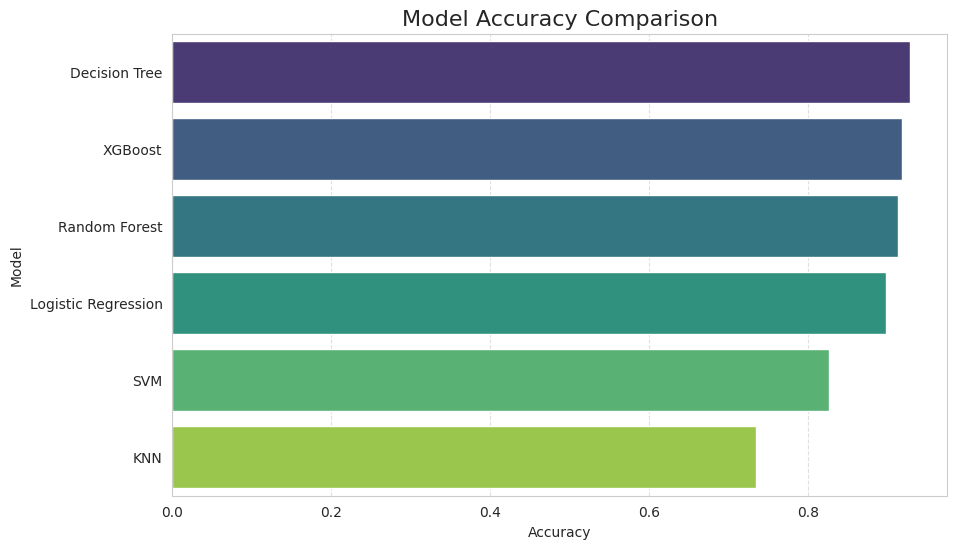

In [10]:
# 📌 Step 5: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()


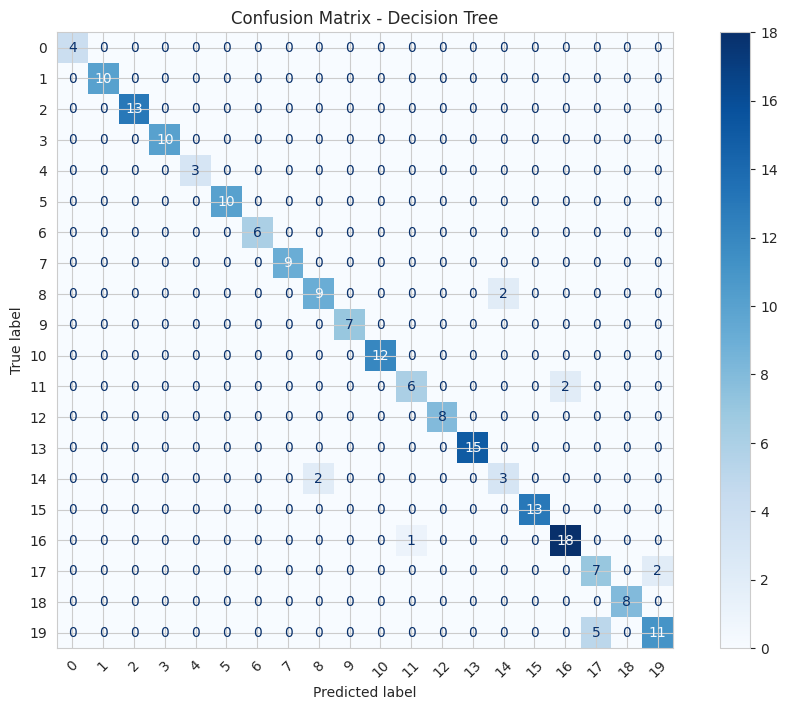

In [11]:
# 📌 Step 6: Confusion Matrix for the Best Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Identify best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

# Predict
y_pred_best = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()


In [13]:
# 📌 Step 3: Import Libraries and Define Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


In [14]:
# 📌 Step 4: Model Training with Cross-Validation and Classification Report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Cross-validation (5 folds)
    cv_scores = cross_val_score(model, X, y, cv=5)
    cv_mean = cv_scores.mean()

    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "Test Accuracy": acc,
        "CV Mean Accuracy": cv_mean,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    }
    print(f"{name} - Accuracy: {acc:.4f}, CV Mean: {cv_mean:.4f}")



🔹 Training Logistic Regression...
Logistic Regression - Accuracy: 0.8980, CV Mean: 0.8834

🔹 Training Decision Tree...
Decision Tree - Accuracy: 0.9286, CV Mean: 0.8915

🔹 Training SVM...
SVM - Accuracy: 0.8265, CV Mean: 0.8383

🔹 Training Random Forest...
Random Forest - Accuracy: 0.9133, CV Mean: 0.9089

🔹 Training KNN...
KNN - Accuracy: 0.7347, CV Mean: 0.7288

🔹 Training XGBoost...
XGBoost - Accuracy: 0.9184, CV Mean: nan


In [15]:
# 📌 Step 5: Summarize Results
results_df = pd.DataFrame(results).T.sort_values(by="Test Accuracy", ascending=False)
print("\n📊 Model Comparison:\n")
display(results_df)



📊 Model Comparison:



,Test Accuracy,CV Mean Accuracy,Precision,Recall,F1-Score
Decision Tree,0.928571,0.891507,0.932376,0.928571,0.928961
XGBoost,0.918367,NaN,0.918695,0.918367,0.918208
Random Forest,0.913265,0.908927,0.921367,0.913265,0.913760
Logistic Regression,0.897959,0.883354,0.908539,0.897959,0.899804
SVM,0.826531,0.838263,0.863948,0.826531,0.823962
KNN,0.734694,0.728770,0.756599,0.734694,0.728841


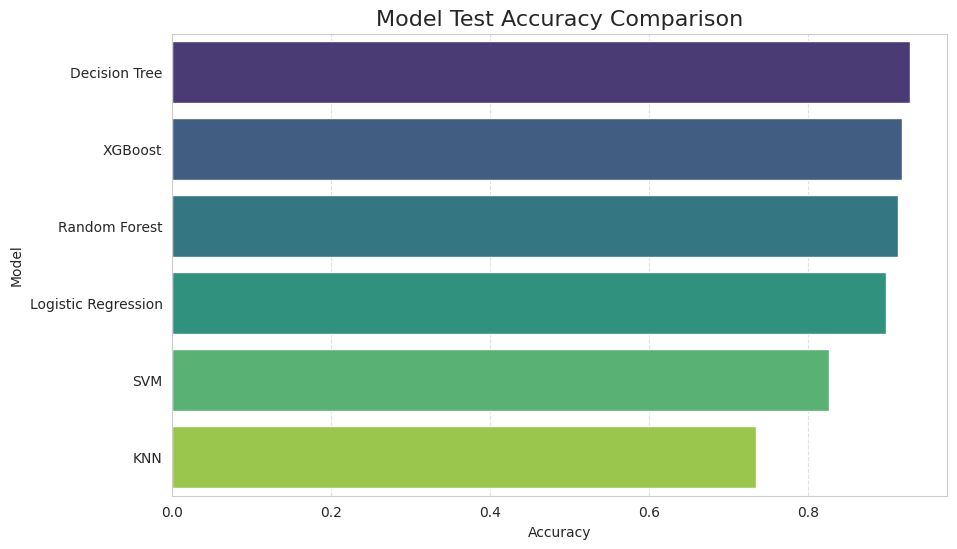

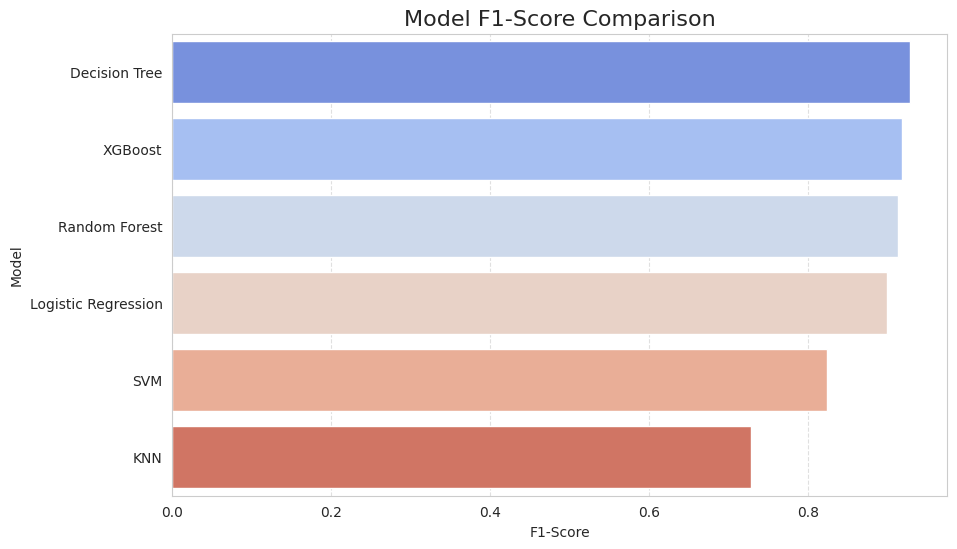

In [16]:
# 📌 Step 6: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=results_df["Test Accuracy"], y=results_df.index, palette="viridis")
plt.title("Model Test Accuracy Comparison", fontsize=16)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=results_df["F1-Score"], y=results_df.index, palette="coolwarm")
plt.title("Model F1-Score Comparison", fontsize=16)
plt.xlabel("F1-Score")
plt.ylabel("Model")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()


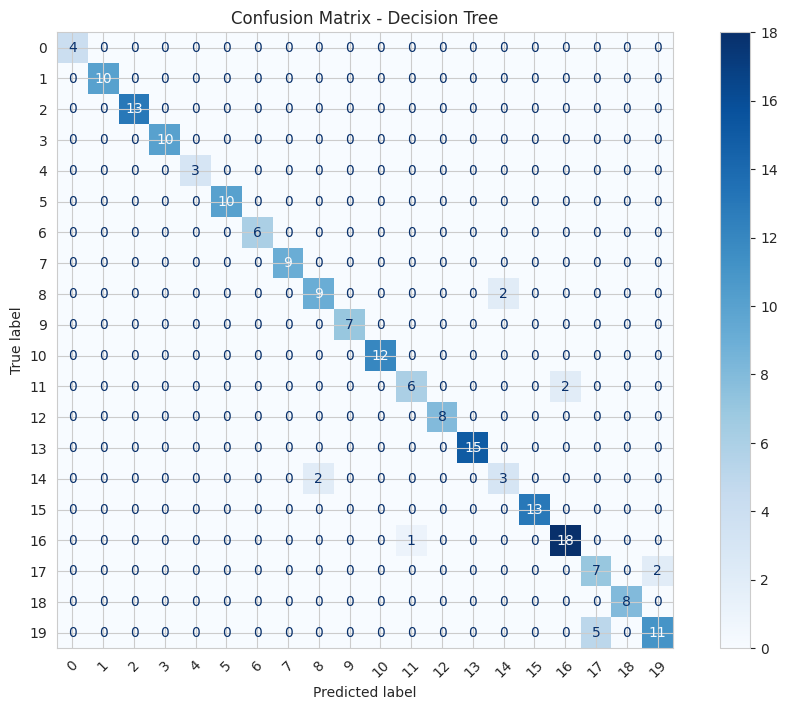

In [17]:
# 📌 Step 7: Confusion Matrix for Best Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model_name = results_df.index[0]
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()
